In [4]:
#import important libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell

# for plotting:
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df = pd.read_excel(r'C:\Users\Big data\Desktop\class\card_git\DB104\funcardproject\data\\card.xls',encoding='utf-16')
df.head()

,Unnamed: 0,age,serveTime,credLimit,Loan,SalPerY,holdCard,Career
0,3448,30.0,NaN,300000,1.0,100000.0,0,2
1,3468,29.0,NaN,250000,1.0,100000.0,0,2
2,3214,29.0,12.0,180000,NaN,100000.0,0,2
3,2598,24.0,NaN,130000,NaN,100000.0,0,3
4,1611,NaN,36.0,60000,0.0,100000.0,0,1


# 觀察缺失值會不會太多

In [52]:
#觀察缺失值
df.info()
#有值者接過半,一般最低好像是40%,這樣看來可以捕值,若太多則須整行拿掉
#統計量
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
Unnamed: 0    2016 non-null int64
age           1711 non-null float64
serveTime     1730 non-null float64
credLimit     2016 non-null int64
Loan          1676 non-null float64
SalPerY       1555 non-null float64
holdCard      2016 non-null int64
Career        2016 non-null int64
dtypes: float64(4), int64(4)
memory usage: 126.1 KB


,Unnamed: 0,age,serveTime,credLimit,Loan,SalPerY,holdCard,Career
count,2016.000000,1711.000000,1730.000000,2.016000e+03,1676.000000,1.555000e+03,2016.000000,2016.000000
mean,1822.538690,26.884278,29.952601,1.475501e+05,0.459427,5.645081e+05,0.442956,2.112599
std,1027.449265,4.791384,58.083863,1.859350e+05,0.885789,4.389883e+05,0.496859,0.634586
min,2.000000,20.000000,0.000000,1.000000e+04,0.000000,1.000000e+05,0.000000,1.000000
25%,963.500000,23.000000,5.000000,5.000000e+04,0.000000,3.600000e+05,0.000000,2.000000
50%,1825.000000,26.000000,13.000000,1.000000e+05,0.000000,5.000000e+05,0.000000,2.000000
75%,2714.250000,30.000000,36.000000,1.800000e+05,1.000000,6.500000e+05,1.000000,2.000000
max,3527.000000,56.000000,1500.000000,4.500000e+06,3.000000,1.000000e+07,1.000000,4.000000


In [44]:
vars_na = [ var for var in df.columns if df[var].isna().sum() > 1]
for var in vars_na:
    print(var, np.round(df[var].isnull().mean(), 3),  ' % missing values')
#只有age ,serveTime ,Loan ,SalPerY 有缺失值,分析這四個分布即可
#在我們卡片原樣本中,0與無資料的差異是否相同?

age 0.151  % missing values
serveTime 0.142  % missing values
Loan 0.169  % missing values
SalPerY 0.229  % missing values


In [38]:
vars_na

['age', 'serveTime', 'Loan', 'SalPerY']

# 依序針對每樣變數以是否有值做分群,觀察該變數是否有值對於其他變數的影響

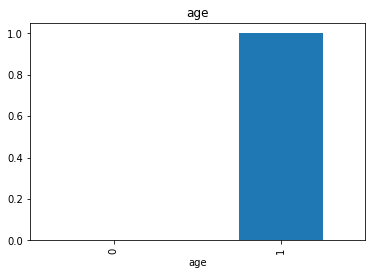

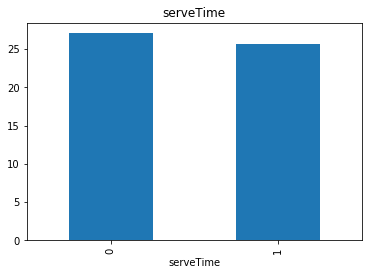

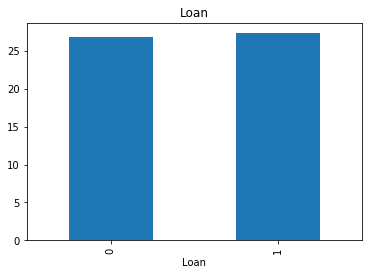

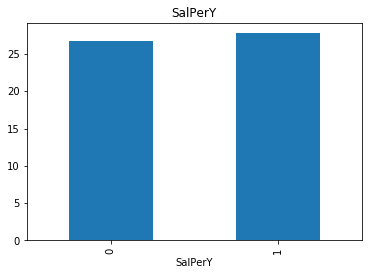

In [48]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # 條件機率,觀察交互影響大不大,若不大,應該用平均數或種樹填補即可
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # plt出在不同項目下,是否為遺漏值之其他變數差異
    df.groupby(var)['age'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

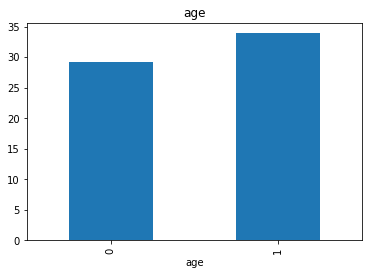

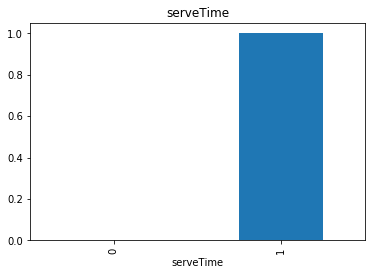

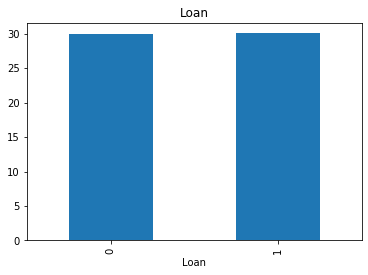

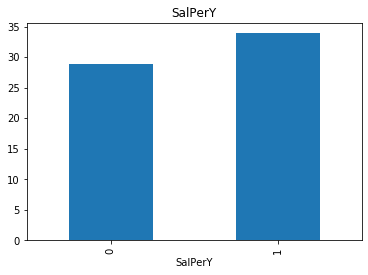

In [49]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # 條件機率,觀察交互影響大不大,若不大,應該用平均數或種樹填補即可
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # plt出在不同項目下,是否為遺漏值之其他變數差異
    df.groupby(var)['serveTime'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

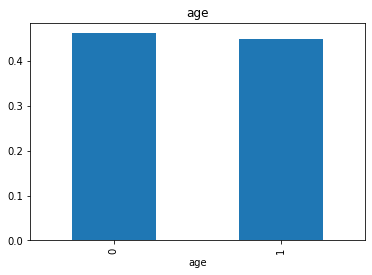

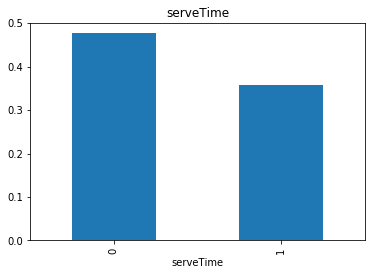

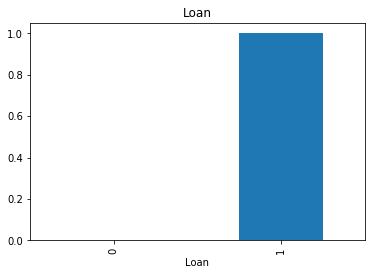

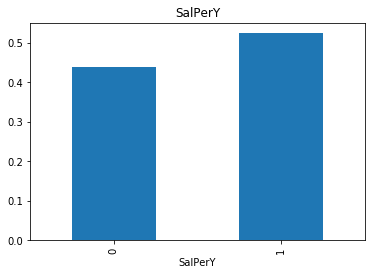

In [50]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # 條件機率,觀察交互影響大不大,若不大,應該用平均數或種樹填補即可
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # plt出在不同項目下,是否為遺漏值之其他變數差異
    df.groupby(var)['Loan'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

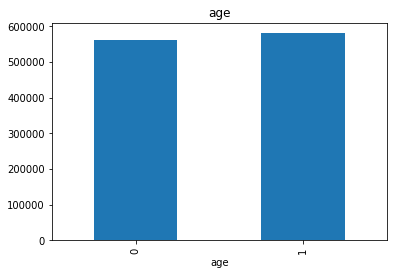

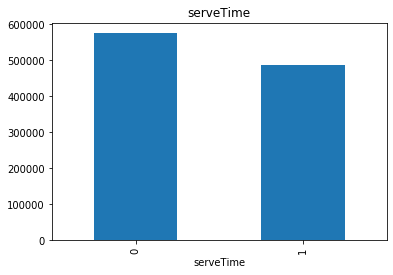

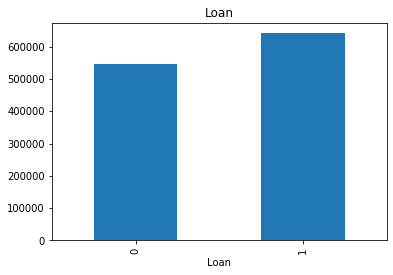

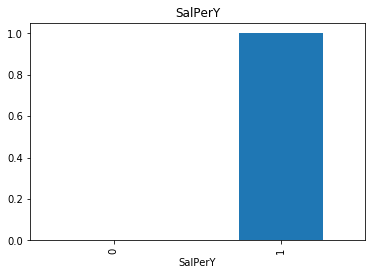

In [51]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # 條件機率,觀察交互影響大不大,若不大,應該用平均數或種樹填補即可
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # plt出在不同項目下,是否為遺漏值之其他變數差異
    df.groupby(var)['SalPerY'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

# 看來似乎該欄位遺漏與否並不影響其他欄位之值(目測)但是還試試看其他補值法

In [136]:
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice
from sklearn.preprocessing import Imputer

In [93]:
#KNN補值
imputed_training = fast_knn(df,k=2)
imputed_training.to_excel("C:\\Users\\Big data\\Desktop\\class\\boredcardproject\\data\\fast_knn.xls")

In [96]:
#mice補值
df_mice = mice(df)
df_mice.to_excel("C:\\Users\\Big data\\Desktop\\class\\boredcardproject\\data\\mice.xls")

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [107]:
#平均數捕值
df_mean = pd.DataFrame(columns=['age', 'serveTime', 'Loan', 'SalPerY'])
df_mean['age']=df['age'].fillna(df['age'].mean())
df_mean['serveTime']=df['serveTime'].fillna(df['serveTime'].mean())
df_mean['Loan']=df['Loan'].fillna(df['Loan'].mean())
df_mean['SalPerY']=df['SalPerY'].fillna(df['SalPerY'].mean())
df_mean.to_excel("C:\\Users\\Big data\\Desktop\\class\\boredcardproject\\data\\df_mean.xls")

,age,serveTime,Loan,SalPerY
0,30.000000,29.952601,1.000000,100000.000000
1,29.000000,29.952601,1.000000,100000.000000
2,29.000000,12.000000,0.459427,100000.000000
3,24.000000,29.952601,0.459427,100000.000000
4,26.884278,36.000000,0.000000,100000.000000
5,20.000000,12.000000,0.000000,100000.000000
6,24.000000,12.000000,0.000000,100000.000000
7,25.000000,12.000000,0.459427,100000.000000
8,20.000000,29.952601,0.000000,100000.000000
9,22.000000,29.952601,0.000000,100000.000000


In [109]:
#眾樹捕值
df_median = pd.DataFrame(columns=['age', 'serveTime', 'Loan', 'SalPerY'])
df_median['age']=df['age'].fillna(df['age'].median())
df_median['serveTime']=df['serveTime'].fillna(df['serveTime'].median())
df_median['Loan']=df['Loan'].fillna(df['Loan'].median())
df_median['SalPerY']=df['SalPerY'].fillna(df['SalPerY'].median())
df_median.to_excel("C:\\Users\\Big data\\Desktop\\class\\boredcardproject\\data\\df_median.xls")

# 以下是作預測額度的分群,轉為類別變數較為直覺(直接可以看到正確率),也可解決極端值問題
# 也可直接預測數值,但會比較麻煩,EX:實際值20000,預測值20001,若用分類來看是錯的,必須要用標準化((20001-20000)/std)後得到MSE以觀察結果好壞

# 在分群之前先觀察全部樣本資料散佈圖,可以看到有極端的額度

Text(0, 0.5, 'sequence')

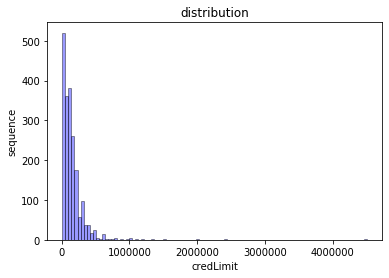

In [224]:
# seaborn histogram
#先觀察和卡額度分布圖,可看到最高有到500萬的離群值,然而大部分的額度都在50萬以下
sns.distplot(df['credLimit'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('distribution')
plt.xlabel('credLimit')
plt.ylabel('sequence')

Text(0, 0.5, 'sequence')

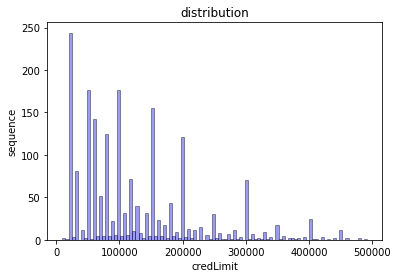

In [98]:
# seaborn histogram
#range取0到50萬,觀察一下分布型態
#可看到有關卡額度
filtered = df[(df >= 0) & (df <500000)]
sns.distplot(filtered['credLimit'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('distribution')
plt.xlabel('credLimit')
plt.ylabel('sequence')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'sequence')

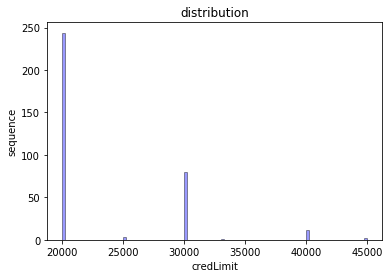

In [225]:
# seaborn histogram
#range取0到10萬
#
filtered = df[(df >= 20000) & (df <50000)]
sns.distplot(filtered['credLimit'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('distribution')
plt.xlabel('credLimit')
plt.ylabel('sequence')

# 若要分群,有2個考量點:
   ## １.分界點必須選在稀疏區(明顯斷層,否則會模稜兩可)
   ##  2.每個區段樣本數不能過少或是數量差異過大
# 分群採用:
# 2W(含)W~4.5W(含)#因為學生很容易斷出來
# 4W~9.5W(含)
# 9.5W到19.5W(含)
# 19.5W以上到29.5W(含)
# 29.5W以上
# 一共五類
# 不一定要這樣分,根據經驗僅供參考

In [132]:
#把credLimit這欄依照上述轉為類別
df_group=df
df_group.loc[(df_group['credLimit'] >= 10) & (df_group['credLimit'] <=45000),'credLimit']=0
df_group.loc[(df_group['credLimit'] > 45000) & (df_group['credLimit'] <=95000),'credLimit']=1
df_group.loc[(df_group['credLimit'] > 95000) & (df_group['credLimit'] <=195000),'credLimit']=2
df_group.loc[(df_group['credLimit'] > 195000) & (df_group['credLimit'] <=295000),'credLimit']=3
df_group.loc[(df_group['credLimit'] > 295000) ,'credLimit']=4

In [133]:
df_group

,Unnamed: 0,age,serveTime,credLimit,Loan,SalPerY,holdCard,Career
0,3448,30.0,NaN,4,1.0,100000.0,0,2
1,3468,29.0,NaN,3,1.0,100000.0,0,2
2,3214,29.0,12.0,2,NaN,100000.0,0,2
3,2598,24.0,NaN,2,NaN,100000.0,0,3
4,1611,NaN,36.0,1,0.0,100000.0,0,1
5,665,20.0,12.0,0,0.0,100000.0,0,1
6,1511,24.0,12.0,0,0.0,100000.0,0,1
7,1520,25.0,12.0,0,NaN,100000.0,0,1
8,1549,20.0,NaN,0,0.0,100000.0,0,1
9,1568,22.0,NaN,0,0.0,100000.0,0,1


Text(0, 0.5, 'sequence')

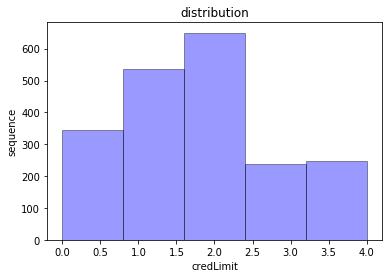

In [134]:
#在檢視一次樣本,各個級數數量並無差太多,應該可以?
sns.distplot(df_group['credLimit'], hist=True, kde=False, 
             bins=int(5), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('distribution')
plt.xlabel('credLimit')
plt.ylabel('sequence')

In [137]:
#再分別依序填補遺漏值
#KNN補值
imputed_training = fast_knn(df_group,k=2)
imputed_training.to_excel("C:\\Users\\Big data\\Desktop\\class\\funcardproject\\data\\fast_knn_group.xls")
#mice補值
mice_group = mice(df_group)
mice_group.to_excel("C:\\Users\\Big data\\Desktop\\class\\funcardproject\\data\\mice_group.xls")
#平均數補值
df_mean_group = pd.DataFrame(columns=['age', 'serveTime', 'Loan', 'SalPerY'])
df_mean_group['age']=df_group['age'].fillna(df_group['age'].mean())
df_mean_group['serveTime']=df_group['serveTime'].fillna(df_group['serveTime'].mean())
df_mean_group['Loan']=df_group['Loan'].fillna(df_group['Loan'].mean())
df_mean_group['SalPerY']=df_group['SalPerY'].fillna(df_group['SalPerY'].mean())
df_mean_group.to_excel("C:\\Users\\Big data\\Desktop\\class\\funcardproject\\data\\df_mean_group.xls")
#眾樹捕值
df_median_group = pd.DataFrame(columns=['age', 'serveTime', 'Loan', 'SalPerY'])
df_median_group['age']=df_group['age'].fillna(df_group['age'].median())
df_median_group['serveTime']=df_group['serveTime'].fillna(df_group['serveTime'].median())
df_median_group['Loan']=df_group['Loan'].fillna(df_group['Loan'].median())
df_median_group['SalPerY']=df_group['SalPerY'].fillna(df_group['SalPerY'].median())
df_median_group.to_excel("C:\\Users\\Big data\\Desktop\\class\\funcardproject\\data\\df_median_group.xls")

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


# 隨機森林 補值 

In [213]:
#隨基森林
#似乎只能用沒有遺漏值的X補Y,因此先用'credLimit','holdCard','Career'補AGE
#參考https://blog.csdn.net/lishangyin88/article/details/80188683
#參考https://ithelp.ithome.com.tw/articles/10191616
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from  sklearn.ensemble import RandomForestClassifier
rf_df=df
#用age以外的補age,(意思是age當Y,其他當X)
te=rf_df[rf_df['age'].notnull()]

te_X=te[['credLimit','holdCard','Career']]
te_Y=te[['age']]#设定输入的Y

te_X=te_X.astype(float)#RF只能吃浮點?
te_Y=te_Y.astype(float)

tr=rf_df[rf_df['age'].isnull()]#把AGE有缺失的欄位抓出來
tr_X=tr[['credLimit','holdCard','Career']].astype(float)#只能吃沒有缺失值的,因此選這三個
tr_Y=tr['age'].astype(float)#訓練的Y
fc=RandomForestClassifier()

fc.fit(te_X,te_Y)#訓練
pr=fc.predict(tr_X)#用以知的預測
rf_df.loc[pd.isnull(rf_df['age']), 'age'] = pr #將預測出來的值取代原來age空欄位的值

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [214]:
#隨機森林,接下來填serveTime 
rf_df1=rf_df
#用age以外的補age,(意思是age當Y,其他當X)
te=rf_df1[rf_df['serveTime'].notnull()]

te_X=te[['age','credLimit','holdCard','Career']]
te_Y=te[['serveTime']]#设定输入的Y

te_X=te_X.astype(float)#RF只能吃浮點?
te_Y=te_Y.astype(float)

tr=rf_df1[rf_df1['serveTime'].isnull()]#把AGE有缺失的欄位抓出來
tr_X=tr[['age','credLimit','holdCard','Career']].astype(float)#只能吃沒有缺失值的,因此選這三個
tr_Y=tr['serveTime'].astype(float)#訓練的Y
fc=RandomForestClassifier()

fc.fit(te_X,te_Y)#訓練
pr=fc.predict(tr_X)#用以知的預測
rf_df1.loc[pd.isnull(rf_df1['serveTime']), 'serveTime'] = pr #將預測出來的值取代原來age空欄位的值

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [217]:
#隨機森林,接下來填Loan
rf_df2=rf_df1
#用age以外的補age,(意思是age當Y,其他當X)
te=rf_df2[rf_df['Loan'].notnull()]

te_X=te[['serveTime','age','credLimit','holdCard','Career']]
te_Y=te[['Loan']]#设定输入的Y

te_X=te_X.astype(float)#RF只能吃浮點?
te_Y=te_Y.astype(float)

tr=rf_df2[rf_df2['Loan'].isnull()]#把AGE有缺失的欄位抓出來
tr_X=tr[['serveTime','age','credLimit','holdCard','Career']].astype(float)#只能吃沒有缺失值的,因此選這三個
tr_Y=tr['Loan'].astype(float)#訓練的Y
fc=RandomForestClassifier()

fc.fit(te_X,te_Y)#訓練
pr=fc.predict(tr_X)#用以知的預測
rf_df2.loc[pd.isnull(rf_df2['Loan']), 'Loan'] = pr #將預測出來的值取代原來age空欄位的值

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [218]:
#隨機森林,接下來填SalPerY
rf_df3=rf_df2
#用age以外的補age,(意思是age當Y,其他當X)
te=rf_df3[rf_df['SalPerY'].notnull()]

te_X=te[['Loan','serveTime','age','credLimit','holdCard','Career']]
te_Y=te[['SalPerY']]#设定输入的Y

te_X=te_X.astype(float)#RF只能吃浮點?
te_Y=te_Y.astype(float)

tr=rf_df2[rf_df3['SalPerY'].isnull()]#把AGE有缺失的欄位抓出來
tr_X=tr[['Loan','serveTime','age','credLimit','holdCard','Career']].astype(float)#只能吃沒有缺失值的,因此選這三個
tr_Y=tr['SalPerY'].astype(float)#訓練的Y
fc=RandomForestClassifier()

fc.fit(te_X,te_Y)#訓練
pr=fc.predict(tr_X)#用以知的預測
rf_df3.loc[pd.isnull(rf_df3['SalPerY']), 'SalPerY'] = pr #將預測出來的值取代原來age空欄位的值

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [220]:
#存檔()
rf_df3.to_excel("C:\\Users\\Big data\\Desktop\\class\\funcardproject\\data\\df_rf.xls")

In [221]:
#隨機森林補值分群版
df_rf_group=rf_df3
df_rf_group.loc[(df_rf_group['credLimit'] >= 10) & (df_rf_group['credLimit'] <=45000),'credLimit']=0
df_rf_group.loc[(df_rf_group['credLimit'] > 45000) & (df_rf_group['credLimit'] <=95000),'credLimit']=1
df_rf_group.loc[(df_rf_group['credLimit'] > 95000) & (df_rf_group['credLimit'] <=195000),'credLimit']=2
df_rf_group.loc[(df_rf_group['credLimit'] > 195000) & (df_rf_group['credLimit'] <=295000),'credLimit']=3
df_rf_group.loc[(df_rf_group['credLimit'] > 295000) ,'credLimit']=4
df_rf_group.to_excel("C:\\Users\\Big data\\Desktop\\class\\funcardproject\\data\\df_rf_group.xls")#存檔()